In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
train_dir = './data/train'
val_dir = './data/val'

labels = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]
print(labels)

['bird_drop', 'clean', 'dusty', 'electrical_damage', 'physical_damage']


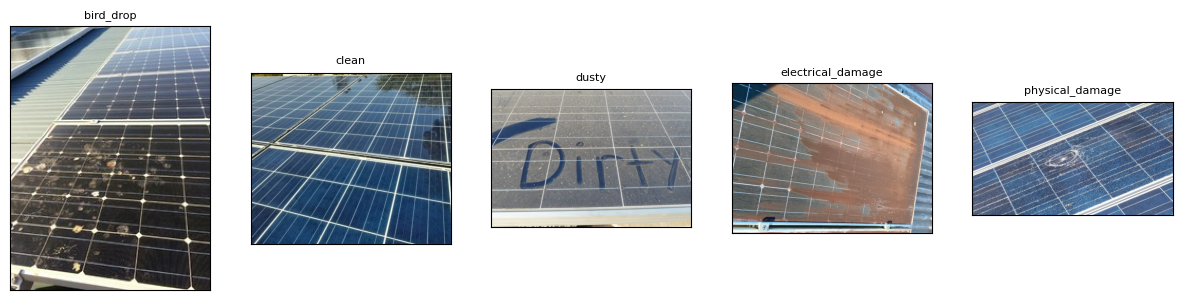

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

for col in range(5):
    label = labels[col]
    img = load_img(f"{os.path.join(os.path.join(train_dir, label), os.listdir(os.path.join(train_dir, label))[0])}")
    # Display the image with its label
    axs[col].imshow(img)
    axs[col].set_title(label, fontsize=8)
    axs[col].set_xticks([])
    axs[col].set_yticks([])
        
plt.show()

In [4]:
for i in range(len(labels)):
    sample_image  = load_img(
        f"{os.path.join(os.path.join(train_dir, labels[i]),os.listdir(os.path.join(train_dir, labels[i]))[0])}"
    )

    sample_array = img_to_array(sample_image)
    print(f"image has shape: {sample_array.shape}")

image has shape: (250, 190, 3)
image has shape: (426, 500, 3)
image has shape: (689, 1000, 3)
image has shape: (1536, 2048, 3)
image has shape: (900, 1600, 3)


In [5]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(300, 300))
    
    validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
    
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                    batch_size=32, 
                                                                    class_mode='categorical',
                                                                    target_size=(300, 300))

    return train_generator, validation_generator

In [6]:
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 1502 images belonging to 5 classes.
Found 379 images belonging to 5 classes.


## Pre-trained Models

In [7]:
from tensorflow.keras.applications import inception_v3, xception, resnet_v2, densenet

pre_trained_model_inceptionV3 = inception_v3.InceptionV3(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = 'imagenet') 
pre_trained_model_xception = xception.Xception(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = 'imagenet') 
pre_trained_model_resnet50v2 = resnet_v2.ResNet50V2(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = 'imagenet')
pre_trained_model_densenet121 = densenet.DenseNet121(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = 'imagenet') 

for layer in pre_trained_model_inceptionV3.layers:
    layer.trainable = False
for layer in pre_trained_model_xception.layers:
    layer.trainable = False
for layer in pre_trained_model_resnet50v2.layers:
    layer.trainable = False
for layer in pre_trained_model_densenet121.layers:
    layer.trainable = False

In [8]:
pre_trained_model_inceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [9]:
pre_trained_model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

In [10]:
pre_trained_model_resnet50v2.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 306, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 150, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 152, 152, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [11]:
pre_trained_model_densenet121.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 306, 306, 3)          0         ['input_4[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 150, 150, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 150, 150, 64)         256       ['conv1/conv[0][0]']

In [12]:
total_params_inceptionV3 = pre_trained_model_inceptionV3.count_params()
num_trainable_params_inceptionV3 = sum([w.shape.num_elements() for w in pre_trained_model_inceptionV3.trainable_weights])
total_params_xception = pre_trained_model_xception.count_params()
num_trainable_params_xception = sum([w.shape.num_elements() for w in pre_trained_model_xception.trainable_weights])
total_params_resnet50v2 = pre_trained_model_resnet50v2.count_params()
num_trainable_params_resnet50v2 = sum([w.shape.num_elements() for w in pre_trained_model_resnet50v2.trainable_weights])
total_params_densenet121 = pre_trained_model_densenet121.count_params()
num_trainable_params_densenet121 = sum([w.shape.num_elements() for w in pre_trained_model_densenet121.trainable_weights])

print(f"There are {total_params_inceptionV3:,} total parameters in Inception V3 model.")
print(f"There are {num_trainable_params_inceptionV3:,} trainable parameters in Inception V3 model.")
print(f"There are {total_params_xception:,} total parameters in XCeption model.")
print(f"There are {num_trainable_params_xception:,} trainable parameters in XCeption model.")
print(f"There are {total_params_resnet50v2:,} total parameters in Resnet50V2 model.")
print(f"There are {num_trainable_params_resnet50v2:,} trainable parameters in Resnet50V2 model.")
print(f"There are {total_params_densenet121:,} total parameters in DenseNet121 model.")
print(f"There are {num_trainable_params_densenet121:,} trainable parameters in DenseNet121 model.")

There are 21,802,784 total parameters in Inception V3 model.
There are 0 trainable parameters in Inception V3 model.
There are 20,861,480 total parameters in XCeption model.
There are 0 trainable parameters in XCeption model.
There are 23,564,800 total parameters in Resnet50V2 model.
There are 0 trainable parameters in Resnet50V2 model.
There are 7,037,504 total parameters in DenseNet121 model.
There are 0 trainable parameters in DenseNet121 model.


In [13]:
output_inceptionV3 = pre_trained_model_inceptionV3.output
output_XCeption = pre_trained_model_xception.output
output_Resnet50V2 = pre_trained_model_resnet50v2.output
output_DenseNet121 = pre_trained_model_densenet121.output

print("Output InceptionV3: ", output_inceptionV3)
print("Output XCeption: ", output_XCeption)
print("Output Resnet50V2: ", output_Resnet50V2)
print("Output DenseNet121: ", output_DenseNet121)

Output InceptionV3:  KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")
Output XCeption:  KerasTensor(type_spec=TensorSpec(shape=(None, 10, 10, 2048), dtype=tf.float32, name=None), name='block14_sepconv2_act/Relu:0', description="created by layer 'block14_sepconv2_act'")
Output Resnet50V2:  KerasTensor(type_spec=TensorSpec(shape=(None, 10, 10, 2048), dtype=tf.float32, name=None), name='post_relu/Relu:0', description="created by layer 'post_relu'")
Output DenseNet121:  KerasTensor(type_spec=TensorSpec(shape=(None, 9, 9, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")


In [14]:
print(f"The pretrained model InceptionV3 has type: {type(pre_trained_model_inceptionV3)}")
print(f"The pretrained model XCeption has type: {type(pre_trained_model_xception)}")
print(f"The pretrained model ResNet50V2 has type: {type(pre_trained_model_resnet50v2)}")
print(f"The pretrained model DenseNet121 has type: {type(pre_trained_model_densenet121)}")

The pretrained model InceptionV3 has type: <class 'keras.engine.functional.Functional'>
The pretrained model XCeption has type: <class 'keras.engine.functional.Functional'>
The pretrained model ResNet50V2 has type: <class 'keras.engine.functional.Functional'>
The pretrained model DenseNet121 has type: <class 'keras.engine.functional.Functional'>


In [15]:
def create_final_model_inceptionV3(pre_trained_model_inceptionV3, output_inceptionV3):
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(output_inceptionV3)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    predictions = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model_inceptionV3.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
def create_final_model_xception(pre_trained_model_xception, output_XCeption):
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(output_XCeption)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    predictions = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model_xception.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [17]:
def create_final_model_resnet50v2(pre_trained_model_resnet50v2, output_Resnet50V2):
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(output_Resnet50V2)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    predictions = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model_resnet50v2.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [18]:
def create_final_model_densenet121(pre_trained_model_densenet121, output_DenseNet121):
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(output_DenseNet121)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    predictions = tf.keras.layers.Dense(5, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model_densenet121.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [19]:
model_inceptionv3 = create_final_model_inceptionV3(pre_trained_model_inceptionV3, output_inceptionV3)
model_xception = create_final_model_xception(pre_trained_model_xception, output_XCeption)
model_resnet50v2 = create_final_model_resnet50v2(pre_trained_model_resnet50v2, output_Resnet50V2)
model_densenet121 = create_final_model_densenet121(pre_trained_model_densenet121, output_DenseNet121)

total_params_inceptionV3 = model_inceptionv3.count_params()
num_trainable_params_inceptionV3 = sum([w.shape.num_elements() for w in model_inceptionv3.trainable_weights])
total_params_xception = model_xception.count_params()
num_trainable_params_xception = sum([w.shape.num_elements() for w in model_xception.trainable_weights])
total_params_resnet50v2 = model_resnet50v2.count_params()
num_trainable_params_resnet50v2 = sum([w.shape.num_elements() for w in model_resnet50v2.trainable_weights])
total_params_densenet121 = model_densenet121.count_params()
num_trainable_params_densenet121 = sum([w.shape.num_elements() for w in model_densenet121.trainable_weights])

print(f"There are {total_params_inceptionV3:,} total parameters in InceptionV3 model.")
print(f"There are {num_trainable_params_inceptionV3:,} trainable parameters in InceptionV3 model.")
print(f"There are {total_params_xception:,} total parameters in XCeption model.")
print(f"There are {num_trainable_params_xception:,} trainable parameters in XCeption model.")
print(f"There are {total_params_resnet50v2:,} total parameters in ResNet50V2 model.")
print(f"There are {num_trainable_params_resnet50v2:,} trainable parameters in ResNet50V2 model.")
print(f"There are {total_params_densenet121:,} total parameters in DenseNet121 model.")
print(f"There are {num_trainable_params_densenet121:,} trainable parameters DenseNet121 model.")

There are 21,802,784 total parameters in InceptionV3 model.
There are 0 trainable parameters in InceptionV3 model.
There are 20,861,480 total parameters in XCeption model.
There are 0 trainable parameters in XCeption model.
There are 23,564,800 total parameters in ResNet50V2 model.
There are 0 trainable parameters in ResNet50V2 model.
There are 7,037,504 total parameters in DenseNet121 model.
There are 0 trainable parameters DenseNet121 model.


In [20]:
history_inceptionv3 = model_inceptionv3.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    verbose = 1)

Epoch 1/20
47/47 [==============================] - 40s 701ms/step - loss: 1.4269 - accuracy: 0.4927 - val_loss: 1.0152 - val_accuracy: 0.6359
Epoch 2/20
47/47 [==============================] - 26s 549ms/step - loss: 0.9073 - accuracy: 0.6558 - val_loss: 0.8243 - val_accuracy: 0.7124
Epoch 3/20
47/47 [==============================] - 26s 548ms/step - loss: 0.7613 - accuracy: 0.7044 - val_loss: 0.7882 - val_accuracy: 0.7203
Epoch 4/20
47/47 [==============================] - 25s 532ms/step - loss: 0.7111 - accuracy: 0.7304 - val_loss: 0.7868 - val_accuracy: 0.7203
Epoch 5/20
47/47 [==============================] - 25s 535ms/step - loss: 0.6768 - accuracy: 0.7377 - val_loss: 0.6915 - val_accuracy: 0.7652
Epoch 6/20
47/47 [==============================] - 25s 537ms/step - loss: 0.6162 - accuracy: 0.7583 - val_loss: 0.6835 - val_accuracy: 0.7625
Epoch 7/20
47/47 [==============================] - 25s 532ms/step - loss: 0.6580 - accuracy: 0.7550 - val_loss: 0.6329 - val_accuracy: 0.7810

In [21]:
history_xception = model_xception.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    verbose = 1)

Epoch 1/20
47/47 [==============================] - 36s 684ms/step - loss: 1.2060 - accuracy: 0.5306 - val_loss: 0.9262 - val_accuracy: 0.6913
Epoch 2/20
47/47 [==============================] - 29s 608ms/step - loss: 0.8061 - accuracy: 0.6691 - val_loss: 0.9386 - val_accuracy: 0.6675
Epoch 3/20
47/47 [==============================] - 29s 609ms/step - loss: 0.7380 - accuracy: 0.7031 - val_loss: 0.8502 - val_accuracy: 0.6860
Epoch 4/20
47/47 [==============================] - 28s 597ms/step - loss: 0.6409 - accuracy: 0.7630 - val_loss: 0.9586 - val_accuracy: 0.6570
Epoch 5/20
47/47 [==============================] - 29s 602ms/step - loss: 0.5993 - accuracy: 0.7696 - val_loss: 0.6464 - val_accuracy: 0.7810
Epoch 6/20
47/47 [==============================] - 29s 604ms/step - loss: 0.5451 - accuracy: 0.7909 - val_loss: 0.6853 - val_accuracy: 0.7414
Epoch 7/20
47/47 [==============================] - 29s 605ms/step - loss: 0.5730 - accuracy: 0.7750 - val_loss: 0.6059 - val_accuracy: 0.7546

In [22]:
history_resnet50v2 = model_resnet50v2.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    verbose = 1)

Epoch 1/20
47/47 [==============================] - 34s 645ms/step - loss: 1.3276 - accuracy: 0.5426 - val_loss: 0.9077 - val_accuracy: 0.7230
Epoch 2/20
47/47 [==============================] - 27s 562ms/step - loss: 0.7676 - accuracy: 0.7084 - val_loss: 0.8190 - val_accuracy: 0.7256
Epoch 3/20
47/47 [==============================] - 26s 556ms/step - loss: 0.6673 - accuracy: 0.7457 - val_loss: 0.7018 - val_accuracy: 0.7335
Epoch 4/20
47/47 [==============================] - 26s 550ms/step - loss: 0.5659 - accuracy: 0.7936 - val_loss: 0.7356 - val_accuracy: 0.7731
Epoch 5/20
47/47 [==============================] - 27s 560ms/step - loss: 0.5280 - accuracy: 0.8023 - val_loss: 0.5945 - val_accuracy: 0.8021
Epoch 6/20
47/47 [==============================] - 26s 561ms/step - loss: 0.4781 - accuracy: 0.8282 - val_loss: 0.6436 - val_accuracy: 0.7731
Epoch 7/20
47/47 [==============================] - 26s 557ms/step - loss: 0.4628 - accuracy: 0.8202 - val_loss: 0.6909 - val_accuracy: 0.7361

In [23]:
history_densenet121 = model_densenet121.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    verbose = 1)

Epoch 1/20
47/47 [==============================] - 40s 710ms/step - loss: 1.1692 - accuracy: 0.5273 - val_loss: 0.8813 - val_accuracy: 0.6781
Epoch 2/20
47/47 [==============================] - 27s 559ms/step - loss: 0.7765 - accuracy: 0.6944 - val_loss: 0.6835 - val_accuracy: 0.7467
Epoch 3/20
47/47 [==============================] - 26s 561ms/step - loss: 0.7242 - accuracy: 0.7190 - val_loss: 0.8450 - val_accuracy: 0.6675
Epoch 4/20
47/47 [==============================] - 27s 569ms/step - loss: 0.6637 - accuracy: 0.7490 - val_loss: 0.7282 - val_accuracy: 0.7256
Epoch 5/20
47/47 [==============================] - 26s 560ms/step - loss: 0.5865 - accuracy: 0.7810 - val_loss: 0.7449 - val_accuracy: 0.7361
Epoch 6/20
47/47 [==============================] - 27s 561ms/step - loss: 0.5835 - accuracy: 0.7790 - val_loss: 0.5723 - val_accuracy: 0.7889
Epoch 7/20
47/47 [==============================] - 27s 567ms/step - loss: 0.5188 - accuracy: 0.8123 - val_loss: 0.5691 - val_accuracy: 0.7836

In [27]:
acc_inceptionV3 = history_inceptionv3.history['accuracy']
val_acc_inceptionV3 = history_inceptionv3.history['val_accuracy']
loss_inceptionV3 = history_inceptionv3.history['loss']
val_loss_inceptionV3 = history_inceptionv3.history['val_loss']

acc_xception = history_xception.history['accuracy']
val_acc_xception = history_xception.history['val_accuracy']
loss_xception = history_xception.history['loss']
val_loss_xception = history_xception.history['val_loss']

acc_resnet50v2 = history_resnet50v2.history['accuracy']
val_acc_resnet50v2 = history_resnet50v2.history['val_accuracy']
loss_resnet50v2 = history_resnet50v2.history['loss']
val_loss_resnet50v2 = history_resnet50v2.history['val_loss']

acc_densenet121 = history_densenet121.history['accuracy']
val_acc_densenet121 = history_densenet121.history['val_accuracy']
loss_densenet121 = history_densenet121.history['loss']
val_loss_densenet121 = history_densenet121.history['val_loss']

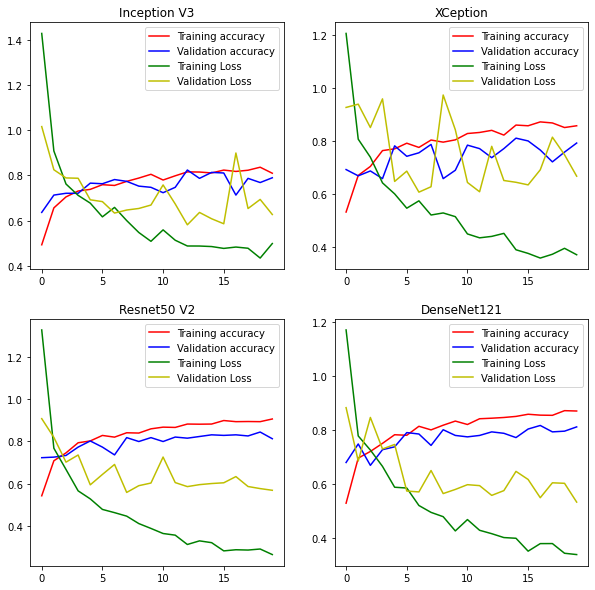

In [48]:
epochs = range(len(acc_inceptionV3))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0, 0].plot(epochs, acc_inceptionV3, 'r', label='Training accuracy')
axs[0, 0].plot(epochs, val_acc_inceptionV3, 'b', label='Validation accuracy')
axs[0, 0].plot(epochs, loss_inceptionV3, 'g', label='Training Loss')
axs[0, 0].plot(epochs, val_loss_inceptionV3, 'y', label='Validation Loss')
axs[0, 0].set_title('Inception V3')
axs[0, 0].legend()

axs[0, 1].plot(epochs, acc_xception, 'r', label='Training accuracy')
axs[0, 1].plot(epochs, val_acc_xception, 'b', label='Validation accuracy')
axs[0, 1].plot(epochs, loss_xception, 'g', label='Training Loss')
axs[0, 1].plot(epochs, val_loss_xception, 'y', label='Validation Loss')
axs[0, 1].set_title('XCeption')
axs[0, 1].legend()

axs[1, 0].plot(epochs, acc_resnet50v2, 'r', label='Training accuracy')
axs[1, 0].plot(epochs, val_acc_resnet50v2, 'b', label='Validation accuracy')
axs[1, 0].plot(epochs, loss_resnet50v2, 'g', label='Training Loss')
axs[1, 0].plot(epochs, val_loss_resnet50v2, 'y', label='Validation Loss')
axs[1, 0].set_title('Resnet50 V2')
axs[1, 0].legend()

axs[1, 1].plot(epochs, acc_densenet121, 'r', label='Training accuracy')
axs[1, 1].plot(epochs, val_acc_densenet121, 'b', label='Validation accuracy')
axs[1, 1].plot(epochs, loss_densenet121, 'g', label='Training Loss')
axs[1, 1].plot(epochs, val_loss_densenet121, 'y', label='Validation Loss')
axs[1, 1].set_title('DenseNet121')
axs[1, 1].legend()

plt.show()

In [51]:
import numpy as np

In [57]:
def show_img(path):
    img = load_img(path, target_size=(300, 300))
    plt.imshow(img)
    plt.show()

In [58]:
def test_img(path, model):
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img) 
    x = np.expand_dims(x, axis=0)
    x /= 255. 
    class_probabilities = model.predict(x)
    class_names = list(train_generator.class_indices.keys()) 
    for (label, p) in zip(class_names, class_probabilities[0]):
        print("", (str(label), p * 100))

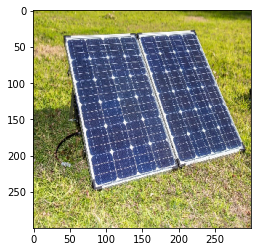

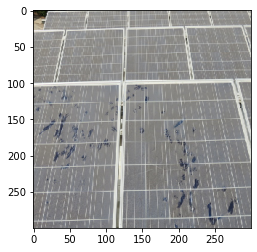

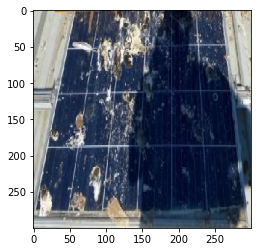

In [72]:
show_img('./clean.jpg')
show_img('./test.jpg')
show_img('./bird.JPG')

In [64]:
test_img('./clean.jpg', model_inceptionv3)

1/1 [==============================] - 0s 21ms/step
 ('bird_drop', 2.8594588860869408)
 ('clean', 23.46377819776535)
 ('dusty', 73.13117980957031)
 ('electrical_damage', 6.496030380276352e-06)
 ('physical_damage', 0.5455767270177603)


In [65]:
test_img('./clean.jpg', model_xception)

1/1 [==============================] - 0s 13ms/step
 ('bird_drop', 3.2212648540735245)
 ('clean', 94.59442496299744)
 ('dusty', 1.6294848173856735)
 ('electrical_damage', 0.0025660820028861053)
 ('physical_damage', 0.5522538907825947)


In [66]:
test_img('./clean.jpg', model_resnet50v2)

1/1 [==============================] - 0s 19ms/step
 ('bird_drop', 3.3868562430143356)
 ('clean', 93.1627631187439)
 ('dusty', 1.466597057878971)
 ('electrical_damage', 0.11880318634212017)
 ('physical_damage', 1.8649827688932419)


In [67]:
test_img('./clean.jpg', model_densenet121)

1/1 [==============================] - 0s 34ms/step
 ('bird_drop', 0.8161216974258423)
 ('clean', 99.03050661087036)
 ('dusty', 0.09718387154862285)
 ('electrical_damage', 0.00014554013887391193)
 ('physical_damage', 0.05603684694506228)


In [60]:
test_img('./test.jpg', model_inceptionv3)

1/1 [==============================] - 0s 24ms/step
 ('bird_drop', 2.7635518461465836)
 ('clean', 0.10285839671269059)
 ('dusty', 97.11713194847107)
 ('electrical_damage', 0.001585056452313438)
 ('physical_damage', 0.01486367400502786)


In [61]:
test_img('./test.jpg', model_xception)

1/1 [==============================] - 0s 23ms/step
 ('bird_drop', 53.748202323913574)
 ('clean', 3.6277297884225845)
 ('dusty', 40.401244163513184)
 ('electrical_damage', 1.8563233315944672)
 ('physical_damage', 0.3665050258859992)


In [62]:
test_img('./test.jpg', model_resnet50v2)

1/1 [==============================] - 0s 18ms/step
 ('bird_drop', 2.4309439584612846)
 ('clean', 0.039686920354142785)
 ('dusty', 97.32092022895813)
 ('electrical_damage', 0.1954665407538414)
 ('physical_damage', 0.012983381748199463)


In [63]:
test_img('./test.jpg', model_densenet121)

1/1 [==============================] - 0s 33ms/step
 ('bird_drop', 3.2910216599702835)
 ('clean', 0.7918955758213997)
 ('dusty', 95.81837058067322)
 ('electrical_damage', 5.879086018012458e-06)
 ('physical_damage', 0.09870447684079409)


In [73]:
test_img('./bird.jpg', model_inceptionv3)

1/1 [==============================] - 0s 16ms/step
 ('bird_drop', 99.77977275848389)
 ('clean', 0.04674761730711907)
 ('dusty', 0.03904220648109913)
 ('electrical_damage', 0.00039680389818386175)
 ('physical_damage', 0.13404700439423323)


In [74]:
test_img('./bird.jpg', model_xception)

1/1 [==============================] - 0s 25ms/step
 ('bird_drop', 99.99881982803345)
 ('clean', 1.0675962336392786e-07)
 ('dusty', 0.0006388675501511898)
 ('electrical_damage', 0.0005215409146330785)
 ('physical_damage', 2.6694294774642913e-05)


In [75]:
test_img('./bird.jpg', model_resnet50v2)

1/1 [==============================] - 0s 28ms/step
 ('bird_drop', 99.99843835830688)
 ('clean', 7.135878945518925e-05)
 ('dusty', 4.355705129910348e-06)
 ('electrical_damage', 0.000236031632994127)
 ('physical_damage', 0.001248737044079462)


In [76]:
test_img('./bird.jpg', model_densenet121)

1/1 [==============================] - 0s 30ms/step
 ('bird_drop', 95.26075720787048)
 ('clean', 0.028731816564686596)
 ('dusty', 4.509181156754494)
 ('electrical_damage', 0.07388711674138904)
 ('physical_damage', 0.1274426467716694)
